################################################################################################################################
#           Assignment 2: Author-Vaishali Lambe, NUID-001286444                            #
################################################################################################################################ 
**Question1:**
* Learn and understand Zipf’s Law.
* Pick any file (or files) in NLTK package.
* Prove if Zipf’s Law works in Natural Language or not.
* REQUIREMENTS: (Must Do) 
    * Use ’glob’ to open and read file. If read multiple files use LOOP to achieve. 
    * Create at least one function and one lambda function.
    * Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 
    * Open your CSV file, generate a log-log figure according to the data you saved. 
    * Write a conclusion at the end of your code base on figure. 
    * (Optional) Use matplotlib to generate a log-log figure in your code. 

################################################################################################################################

In [1]:
# Import standard modules.
from glob import glob
import os
import string

# Import nltk
import nltk

# Import gutenberg from nltk.corpus
from nltk.corpus import gutenberg

print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [2]:
# Get just the Austen files from the Gutenberg collection.
print('nltk.data.path: ' + str(nltk.data.path))

# Save the current working directory, because we're going to change it to find the Austen files in NLTK.
current_path = os.getcwd()
print(current_path)

# Find the Austen files using glob.
austen_files = []
for p in nltk.data.path:
    if os.path.isdir(p):
        os.chdir(os.path.join(p, 'corpora/gutenberg'))
        austen_files = glob('austen*txt')
        if len(austen_files) > 0:
            # Found them, so stop.  Don't want multiple copies.
            break

print('austen files: ' + str(austen_files))

# Use a function to determine if a token is a valid word.
def is_valid_word(w):
    if w in string.punctuation:
        # Don't consider punctuation to be a valid word.
        return False
    
    return True

all_austen_words = nltk.corpus.gutenberg.words(austen_files)
austen_words = list([w.lower() for w in all_austen_words 
                          if is_valid_word(w.lower())])

print('\nFirst hundred words in austen_words:')
print(austen_words[0:100])

nltk.data.path: ['C:\\Users\\Admin/nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\Admin\\Anaconda3\\nltk_data', 'C:\\Users\\Admin\\Anaconda3\\lib\\nltk_data', 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data']
C:\Users\Admin\Documents\DataAnalysisUsingPython\Assignment 2
austen files: ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt']

First hundred words in austen_words:
['emma', 'by', 'jane', 'austen', '1816', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence'

In [3]:
# import FreqDist class
from nltk import FreqDist

# Create frequency distribution object
fd = FreqDist()

# For each token in the relevant text, increment its counter
for word in austen_words:
    fd[word] += 1

# Total number of samples
print (fd.N())

# Number of unique words
print (fd.B())

# Look at the top 20 words sorted by frequency.  Use a lambda function.
common_words = map(lambda p: str(p[0]) + ' ' + str(p[1]), fd.most_common(20))
for cw in common_words:
    print(cw)

375461
10631
the 12635
to 12163
and 11188
of 10433
a 6816
i 6306
her 6224
was 5596
in 5556
it 5323
she 5099
not 4322
be 4230
that 4073
he 3875
had 3808
you 3799
as 3466
for 3316
but 2991


In [4]:
import pandas as pd

# Generate a (rank, frequency) point for each counted token and
# and append to the respective lists, Note that the iteration
# over fd is automatically sorted.
row_list = []
rank = 0
for x in fd.most_common():
    word = x[0]
    count = x[1]
    rank += 1
    row = {'Word':word, 'Rank':rank, 'Frequency':count}
    row_list.append(row)
    
# Check the row list.    
print(row_list[0:5])

# Initialize a dataframe to hold our data.
df = pd.DataFrame(row_list, columns=['Word', 'Rank','Frequency'])

# Examine the dataframe.
print(df.head(20))

[{'Rank': 1, 'Word': 'the', 'Frequency': 12635}, {'Rank': 2, 'Word': 'to', 'Frequency': 12163}, {'Rank': 3, 'Word': 'and', 'Frequency': 11188}, {'Rank': 4, 'Word': 'of', 'Frequency': 10433}, {'Rank': 5, 'Word': 'a', 'Frequency': 6816}]
    Word  Rank  Frequency
0    the     1      12635
1     to     2      12163
2    and     3      11188
3     of     4      10433
4      a     5       6816
5      i     6       6306
6    her     7       6224
7    was     8       5596
8     in     9       5556
9     it    10       5323
10   she    11       5099
11   not    12       4322
12    be    13       4230
13  that    14       4073
14    he    15       3875
15   had    16       3808
16   you    17       3799
17    as    18       3466
18   for    19       3316
19   but    20       2991


In [5]:
# Write the CSV file.  Don't write the row numbers (index).
df.to_csv(os.path.join(current_path, 'austen-zipflaw.csv'), index=False, encoding='utf-8')
df = None

In [6]:
# Import data from csv
csv_data = pd.read_csv(os.path.join(current_path, 'austen-zipflaw.csv'), encoding='utf-8')

# Examine the dataframe.
print(csv_data.head(20))

    Word  Rank  Frequency
0    the     1      12635
1     to     2      12163
2    and     3      11188
3     of     4      10433
4      a     5       6816
5      i     6       6306
6    her     7       6224
7    was     8       5596
8     in     9       5556
9     it    10       5323
10   she    11       5099
11   not    12       4322
12    be    13       4230
13  that    14       4073
14    he    15       3875
15   had    16       3808
16   you    17       3799
17    as    18       3466
18   for    19       3316
19   but    20       2991


In [7]:
#Import matplotlib
import matplotlib

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

%matplotlib inline 

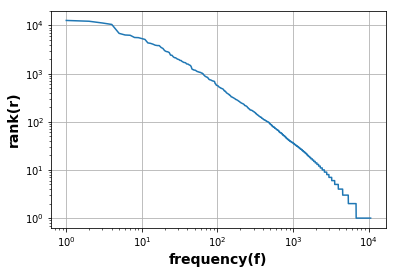

In [8]:
# Plot rank vs frequency on a log log plot and show the plot
plt.loglog(csv_data['Rank'], csv_data['Frequency'])
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

**Observations:**
* Here to same observations as we did for shakespeare words so let's take the r^2 value to find best fit line and linear regression 

In [9]:
# Compute the best fit line.
import numpy as np

logFrequency = np.log10(csv_data['Frequency'])
logRank = np.log10(csv_data['Rank'])

coefficients=np.polyfit(logFrequency, logRank, 1)
print(coefficients)

[-0.64359854  3.97612596]


In [10]:
# Compute the r^2 value for the linear regression.
import scipy

def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

print(rsquared(logFrequency, logRank))

0.974173681853
